#### Flow
    [1] Ingest Data

    Business problem appreciation
       Need for this study
       Evaluation criteria selection
    Data appreciation
       Relevance, quality, availability of data
    EDA
       Univariate analysis

    [2] Bivariate analysis
    Hypothesis testing


    [3] Model building
    Feature transformation, engineering, selection
    Regression assumptions – before fitting model
    Train, test split
    Fit model(s)

    [4] Model validation
    Hypothesis tests
    Regression assumptions – after fitting model

In [243]:
#importing
import warnings
warnings.filterwarnings("ignore")
import pandas as pd  #data analysis
import os # importing os module to set the working directory
import seaborn as sns #for data visualization and exploratory data analysis
import numpy as np  #calculations
import matplotlib.pyplot as plt #graph
import scipy.stats as stats #stats
import pylab 

In [203]:
#ingesting data
df = pd.read_csv(r"C:\Users\RAHUL\Desktop\DS_Monali\@SEM2\PPP\Project1\insurance_data.csv") #reading
df

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


#Business problem appreciation

1. Need for this study:

Aim of insurance company -  to generate revenue

will generate revenue if collection amount > spending on medical care + other costs 

so collection amount should be higher and spending on medical care + other costs should be lower

In this study we will deal with spending on medical care ie claim (target variable). 

for other costs:

. Most insurance companies calculate insurance claim by using actuarial table
. (actuarial table -to assess the risk of financial loss and predict likelihood of an insurance claim based on features like age, gender,etc)
.In this process cost of actuaries will also be saved by using machine learning. 

. So, This study will help insurance companies to automate their decision making process(here claim amount) with better accuracy


2. Evaluation criteria selection	

overprediction will be undesirable
RMSE
rsquare
adjusted rsquare

Questions:

1. Are there any missing or zero values? is it possible for it to be zero or missing?
2. Is there any relationship between missing values and claim
3. How much are the missing values & what is the %? How are u going to deal with it?
2. Duplicates? 

In [204]:
#Data appreciation-Relevance, quality, availability of data

#Relevance
#In the given dataset patientID is not relevant for predicting insurance claim

#Quality

# checking duplicate rows
duplicate = df[df.duplicated()]
print(duplicate)


#Availability
#No mention on which bloodpressure values are whether systolic or diastolic 

#checking missing values
print(df.isnull().sum()) 

print("")
print("%of missing values")
print("")

#here checking percentage of missing values present in each variable
for column in df.columns: #for each column in data
    null = (sum(df[column].isnull())/len(df[column])) * 100  #calculating % of null values 
    print(column, null) # printing variable name and %of missing values 

Empty DataFrame
Columns: [PatientID, age, gender, bmi, bloodpressure, diabetic, children, smoker, region, claim]
Index: []
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

%of missing values

PatientID 0.0
age 0.3731343283582089
gender 0.0
bmi 0.0
bloodpressure 0.0
diabetic 0.0
children 0.0
smoker 0.0
region 0.22388059701492538
claim 0.0


    No duplicate rows
    Yes we have missing values in age and region. It's not possible to have these values missing. so we will impute them

In [67]:
#Imputing missing values

In [205]:
#for region- replacing with mode
mode= df['region'].mode()[0]
df['region'].fillna(mode, inplace=True)
df['region']

0       southeast
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1335    northwest
1336    northeast
1337    northwest
1338    southeast
1339    southeast
Name: region, Length: 1340, dtype: object

In [206]:
#creating function for imputing missing values with mean
def impute_nan(df,variable,mean):
    df[variable+"_mean"]=df[variable].fillna(mean)

In [207]:
#calculation of mean for age column
mean=df.age.mean()
#imputing with mean
impute_nan(df,'age',mean)
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_mean
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,39.000000
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,24.000000
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94,38.078652
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40,38.078652
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01,38.078652


In [208]:
#after imputation checking by how much amount variance is changed 
print(df['age'].std())
print(df['age_mean'].std())
# there's almost no change in original variance

11.102923881591513
11.082174613072029


In [113]:
import matplotlib.pyplot as plt
%matplotlib inline

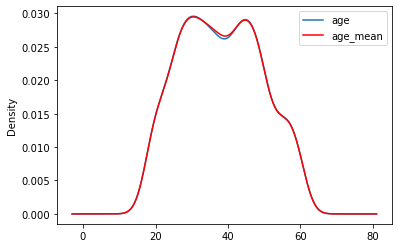

In [114]:
#checking distribution of age and age_mean (ie age after imputation)
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde', ax=ax)
df.age_mean.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#kde=kernel density estimator
# age_mean is above age in the middle because we replaced nan with mean & mean~ median

In [115]:
#checking again for any null values
print(df.isnull().sum())

PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
age_mean         0
dtype: int64


In [209]:
#dropping unnecessary columns
df = df.drop('PatientID',axis=1)  #dropping id column
df = df.drop('age',axis=1) #dropping age column as we have age column with imputed mean

### EDA

In [117]:
df.head() #to display first 5 rows

,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_mean
0,male,23.2,91,Yes,0,No,southeast,1121.87,39.000000
1,male,30.1,87,No,0,No,southeast,1131.51,24.000000
2,male,33.3,82,Yes,0,No,southeast,1135.94,38.078652
3,male,33.7,80,No,0,No,northwest,1136.40,38.078652
4,male,34.1,100,No,0,No,northwest,1137.01,38.078652


#categorizing variables

In [118]:
print(df.dtypes)

gender            object
bmi              float64
bloodpressure      int64
diabetic          object
children           int64
smoker            object
region            object
claim            float64
age_mean         float64
dtype: object


In [210]:
# making list of categorical variables  out of all variables 
categorical_variables = [variable for variable in df.columns if df[variable].dtypes == 'O'] 
#for each of the variable in df.column, if datatype of variable is equal to object then it will be categorical variable  

print('Number of categorical variables: ', len(categorical_variables ))

# visualising first 5 rows of the categorical variables 
df[categorical_variables ].head()

Number of categorical variables:  4


,gender,diabetic,smoker,region
0,male,Yes,No,southeast
1,male,No,No,southeast
2,male,Yes,No,southeast
3,male,No,No,northwest
4,male,No,No,northwest


In [211]:
# making list of numerical variables out of all variables 
numerical_variables = [variable for variable in df.columns if df[variable].dtypes != 'O'] 
#for each of the variable in df.column, if datatype of variable is not equal to object then it will be numerical variable  

print('Number of numerical variables: ', len(numerical_variables))

# visualising first 5 rows of the numerical variables
df[numerical_variables].head()

Number of numerical variables:  5


,bmi,bloodpressure,children,claim,age_mean
0,23.2,91,0,1121.87,39.000000
1,30.1,87,0,1131.51,24.000000
2,33.3,82,0,1135.94,38.078652
3,33.7,80,0,1136.40,38.078652
4,34.1,100,0,1137.01,38.078652


In [212]:
#discrete variables
discrete_variables=[variable for variable in numerical_variables if len(df[variable].unique())<7]
#for each of the variable in numerical_variables, if unique values of variable are less than 7 then it will be a discrete variable  

print("Discrete Variables Count: {}".format(len(discrete_variables))) #printing no of discrete variables 

# visualising first 5 rows of the discrete variables
df[discrete_variables].head() 

Discrete Variables Count: 1


,children
0,0
1,0
2,0
3,0
4,0


In [213]:
#continuous variables
continuous_variables=[variable for variable in numerical_variables if variable not in discrete_variables + ["date"]]
#for each of the variable in numerical_variables, if variable is not in the discrete_variables then it will be a continuous variable  

print("Continuous variables Count {}".format(len(continuous_variables))) #printing no of continuous variables

# visualising first 5 rows of the continuous variables
df[continuous_variables].head() 

Continuous variables Count 4


,bmi,bloodpressure,claim,age_mean
0,23.2,91,1121.87,39.000000
1,30.1,87,1131.51,24.000000
2,33.3,82,1135.94,38.078652
3,33.7,80,1136.40,38.078652
4,34.1,100,1137.01,38.078652


#### Univariate Analysis

Questions:
1. What is the description of each variable in the data ? 
2. what is the distribution form of every variable? what will be the future reference ?
3. Whether the variable is leptokurtic or platykurtic or mesokurtic?. what will be the future reference ?
4. What is the range of variable? what will be the future reference ?
5. Any outliers? Whether they are non-error outliers or error outliers? How are u going to deal with it and why u want to deal with it ?

#Q1 Description of each variable:

Our dataset have total 10 features

1. PatientID- id of a policyholder , numerical-discrete
    
2. age: age of the policyholder , numerical-continuous
        
3. gender: gender of policyholder (female=0, male=1) , categorical- nominal
        
4. bmi: Body mass index, measure of body fat based on height and weight, numerical-continuous
        calculation- ratio of height to weight, unit-(kg / m ^ 2) 
        interpretation:
        below 18.5	 Underweight
        18.5 - 24.9 	 Normal
        25.0 - 29.9 	 Overweight
        above 30.0	 Obese    
        

5. bloodpressure: bp of policyholder , numerical-continuous
                  normal range-  > 80 for diastolic & >120 for systolic bloodpressure
                  But in our dataset we only have one value for bloodpressure.
 

6. diabetic: whether the policyholder is diabetic or not, categorical-nominal
             yes/no
    

7. children: how many children policyholder have , numerical-discrete

8. smoker:  whether the policyholder is smoker or not, categorical-nominal
            yes/no
         
            
9. region: in which region policyholder live , categorical-nominal 
            
10. claim: claim amount given to patients by health insurance company , numeric-continuous
    

#Q3 what is the distribution form of every variable? what will be the future reference ?

In [326]:
#Univariate for categorical

gender
female    662
male      678
Name: gender, dtype: int64
diabetic
No     698
Yes    642
Name: diabetic, dtype: int64
smoker
No     1066
Yes     274
Name: smoker, dtype: int64
region
northeast    231
northwest    349
southeast    446
southwest    314
Name: region, dtype: int64


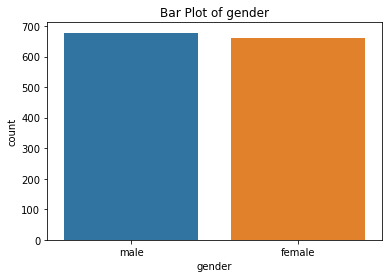

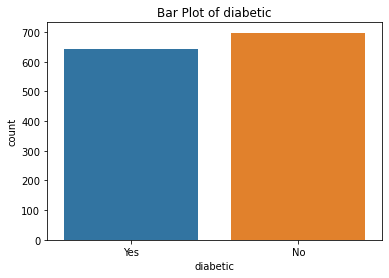

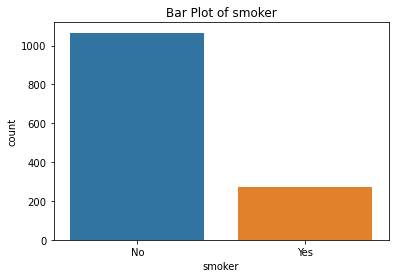

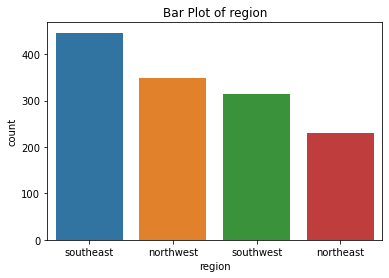

In [123]:
for variable in categorical_variables:
    plt.figure()                              #to create a new figure with customizations
    plt.clf()                                 #to clear the entire current figure
    print(df.groupby(variable)[variable].count())
    sns.countplot(df[variable]).set_title('Bar Plot of {}'.format(variable)) #Plotting barplot for column and Setting up the title


1. Gender:
   Almost equal number of female and male policyholders. female- 662 , male- 678

2. Diabetic:
   Almost similar number of policyholders for diabetic and non-diabetic. No- 698, Yes- 642

3. Smoker:
   More non-smokers than smokers (maybe reason behind highly varying claim amount). No- 1066 , Yes- 274
   
4. Region:
   Policyholders in southeast>northwest>southwest>northeast. southeast- 446, northwest- 349, southwest- 314, northeast- 231

In [24]:
#Univariate analysis for discrete variable

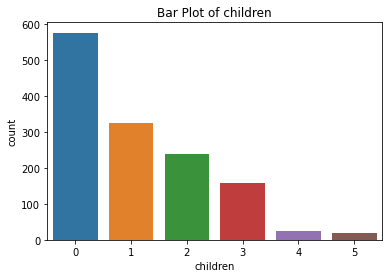

In [124]:
for variable in discrete_variables:          #for each variable in discrete_variables do:
        plt.figure()                          #to create a new figure with customizations
        plt.clf()                             #to clear the entire current figure
        sns.countplot(df[variable]).set_title('Bar Plot of '+ variable) #Plotting barplot for column and Setting up the title

In [125]:
df[discrete_variables].describe()  #statistical summary

,children
count,1340.000000
mean,1.093284
std,1.205334
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,5.000000


In [126]:
for number in range( min(df['children']), max(df['children'])+1):
    print(str(number) + " children - " ,  len(df[df["children"]==number])/len(df['children'])*100 , " %")

0 children -  42.98507462686567  %
1 children -  24.17910447761194  %
2 children -  17.91044776119403  %
3 children -  11.716417910447761  %
4 children -  1.8656716417910446  %
5 children -  1.3432835820895521  %


#Analysis:

    Range = 0 to 5 
    children(0>1>2>3>4>5)
    Policyholder on an average have 1 child
    Number of policyholders with no or 1 or 2 children are ~86%
    Number of policyholders with 3 or 4 children are ~14%

In [127]:
#Univariate analysis of continuous variables
df[continuous_variables].describe()  #statistical summary

,bmi,bloodpressure,claim,age_mean
count,1340.000000,1340.000000,1340.000000,1340.000000
mean,30.668955,94.157463,13252.745642,38.078652
std,6.106735,11.434712,12109.609288,11.082175
min,16.000000,80.000000,1121.870000,18.000000
25%,26.275000,86.000000,4719.685000,29.000000
50%,30.400000,92.000000,9369.615000,38.000000
75%,34.700000,99.000000,16604.305000,47.000000
max,53.100000,140.000000,63770.430000,60.000000


skewness for bmi = 0.28597245020808587
Kurtosis for bmi= -0.060200212623761296
CV for bmi= 5.022152818950827
skewness for bloodpressure = 1.4835342102293079
Kurtosis for bloodpressure= 2.890031852235991
CV for bloodpressure= 8.234353845786819
skewness for claim = 1.5167468509489237
Kurtosis for claim= 1.6102462646376146
CV for claim= 1.0943991112097826
skewness for age_mean = 0.11382341584545372
Kurtosis for age_mean= -0.9393129293109181
CV for age_mean= 3.436027044771286


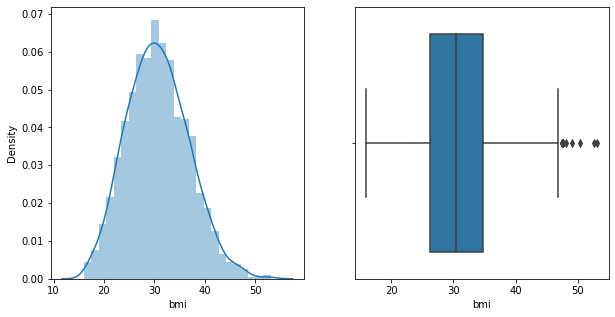

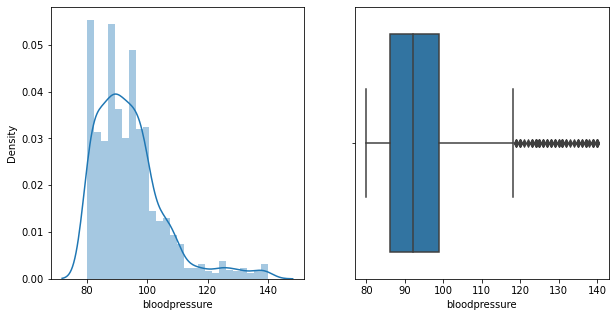

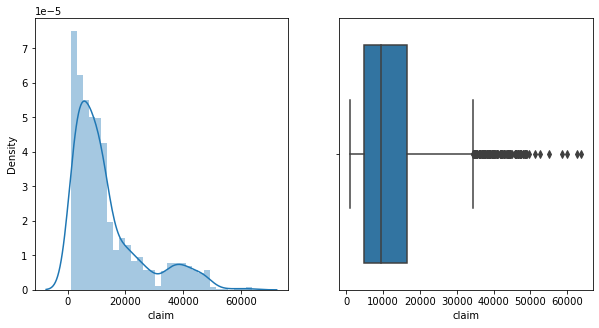

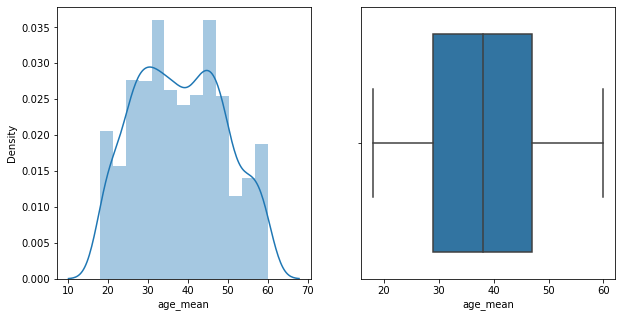

In [128]:
for variable in continuous_variables:          #for each variable in continuous_variables do:
    fig_dims = (10, 5)
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
    sns.distplot(df[variable], kde=True, ax=axs[0])   #plot histogram
    sns.boxplot(x= variable, data=df, ax=axs[1])   #plot boxplot
    print("skewness for {} = {}".format(variable, df[variable].skew()))  #print skewness
    print("Kurtosis for {}= {}".format(variable, df[variable].kurtosis()))  #print kurtosis
    print("CV for {}= {}".format(variable, df[variable].mean()/df[variable].std()))  #print CV    

#Analysis:

Age  

    range= 18 to 60 #whole age group is covered which is good
    mean ~ median
    median - 38
    age distribution is fairly symmetrical
    Platykurtic
    SD ~ 11
    CV =3.436
    Age has a broad maximum plateau in the middle. This is expected as people in age group 30-50 are most likely to take insurance policy
    No outliers

BMI

    range= 16 to 53
    mean ~ median
    median =30
    mean -30.66 which falls in obese category
    25th percentile- 26 bmi, Hence more than 75 % of policyholders do not have normal bmi. 
    Distribution is fairly symmetrical
    platykurtic
    SD~ 6
    CV= 5.02
    Outliers present on upper side

Bloodpressure

    range= 80 to 140
    mean = 94.16
    mean != median
    median = 92
    distribution is highly right skewed
    platykurtic
    More than 75% of policyholders are having normal bloodpressure
    SD ~11
    CV= 8.23
    Outliers present
    according to the distribution it looks like systolic bloodpressure
    lot of outliers on upper side

Claim 

    range =1122 to 63770
    mean != median
    median ~ 9370
    distribution is highly right skewed, bump around 40000
    platykurtic
    SD ~ 12109
    CV= 1.09
    lot of outliers present on upper end

Outliers:

In [129]:
# BMI
# Assuming bmi follows ~ Gaussian Distribution,calculating the boundaries which differentiates the outliers

uppper_boundary=df['bmi'].mean() + 3* df['bmi'].std()
lower_boundary=df['bmi'].mean() - 3* df['bmi'].std()
print(lower_boundary), print(uppper_boundary),print(df['bmi'].mean())

12.34875092335458
48.989159524406595
30.668955223880587


(None, None, None)

In [130]:
df.loc[df['bmi']>=48.98]

,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_mean
9,male,53.1,97,No,0,No,northwest,1163.46,30.0
141,male,50.4,89,Yes,1,No,southeast,2438.06,46.0
802,male,49.1,109,Yes,0,No,southeast,11381.33,42.0
1299,male,52.6,110,No,1,Yes,southeast,44501.40,50.0


For bmi we can see that max value is 53.1 bmi which is non-error outlier. Hence it's our population interest, So not removing
We are replacing it.

In [131]:
#Replacing
data=df.copy()
data.loc[data['bmi']>48.989159524406595,'bmi']=48.989159524406595

In [132]:
#checking 
df['bmi'].describe(), data['bmi'].describe()

(count    1340.000000
 mean       30.668955
 std         6.106735
 min        16.000000
 25%        26.275000
 50%        30.400000
 75%        34.700000
 max        53.100000
 Name: bmi, dtype: float64,
 count    1340.000000
 mean       30.662057
 std         6.084026
 min        16.000000
 25%        26.275000
 50%        30.400000
 75%        34.700000
 max        48.989160
 Name: bmi, dtype: float64)

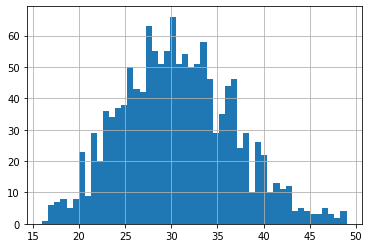

In [133]:
figure=data.bmi.hist(bins=50)

In [134]:
#Bloodpressure
# As distribution of bloodpressure is skewed, boundries are-

IQR = df.bloodpressure.quantile(0.75)-df.bloodpressure.quantile(0.25) #computing the Interquantile range to calculate the boundaries

lower_bridge=df['bloodpressure'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['bloodpressure'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

66.5
118.5


(None, None)

It is giving maximum bloodpressure as 118.5 but normal bloodpressure itself is 120 hence calculating extreme outlier

In [135]:
#### Extreme outliers
lower_bridge=df['bloodpressure'].quantile(0.25)-(IQR*3)
upper_bridge=df['bloodpressure'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

47.0
138.0


(None, None)

In [136]:
df.loc[df['bloodpressure']>=138.0]

,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_mean
1174,female,29.1,139,No,0,Yes,northwest,29141.36,44.0
1210,male,30.8,140,Yes,0,Yes,southwest,35491.64,25.0
1225,female,34.8,140,Yes,2,No,southwest,36910.61,50.0
1226,male,35.5,140,Yes,0,Yes,southeast,36950.26,46.0
1230,female,30.8,139,No,0,Yes,northeast,37270.15,58.0
1242,female,36.7,140,No,2,Yes,northeast,38511.63,27.0
1254,male,44.9,138,Yes,0,Yes,southeast,39722.75,46.0
1256,male,30.9,139,No,0,Yes,southwest,39727.61,27.0
1257,male,36.7,139,Yes,1,Yes,northeast,39774.28,43.0
1290,male,41.9,140,Yes,3,Yes,northeast,43753.34,47.0


In [137]:
#Replacing
data=df.copy()
data.loc[data['bloodpressure']>138,'bloodpressure']=138

In [138]:
df['bloodpressure'].describe(), data['bloodpressure'].describe()

(count    1340.000000
 mean       94.157463
 std        11.434712
 min        80.000000
 25%        86.000000
 50%        92.000000
 75%        99.000000
 max       140.000000
 Name: bloodpressure, dtype: float64,
 count    1340.000000
 mean       94.147015
 std        11.393762
 min        80.000000
 25%        86.000000
 50%        92.000000
 75%        99.000000
 max       138.000000
 Name: bloodpressure, dtype: float64)

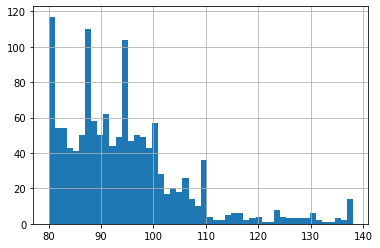

In [139]:
figure=data.bloodpressure.hist(bins=50)

In [140]:
#claim
# As distribution of claim is skewed, boundries are-

IQR=df.claim.quantile(0.75)-df.claim.quantile(0.25) #computing the Interquantile range to calculate the boundaries

lower_bridge=df['claim'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['claim'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-13107.245
34431.235


(None, None)

In [141]:
df.loc[df['claim']>=34431.235]

,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_mean
1199,female,33.1,93,Yes,0,Yes,southeast,34439.86,30.0
1200,male,32.7,98,No,0,Yes,southwest,34472.84,40.0
1201,male,33.5,81,No,0,Yes,northeast,34617.84,45.0
1202,male,31.7,125,No,0,Yes,southeast,34672.15,32.0
1203,male,34.8,94,Yes,0,Yes,southwest,34779.62,26.0
...,...,...,...,...,...,...,...,...,...
1335,female,35.5,88,Yes,0,Yes,northwest,55135.40,44.0
1336,female,38.1,120,No,1,Yes,northeast,58571.07,59.0
1337,male,34.5,91,Yes,3,Yes,northwest,60021.40,30.0
1338,male,30.4,106,No,0,Yes,southeast,62592.87,37.0


In [142]:
#Replacing
data=df.copy()
data.loc[data['claim']>34431.235,'claim']=34431.235

In [143]:
df['claim'].describe(), data['claim'].describe()

(count     1340.000000
 mean     13252.745642
 std      12109.609288
 min       1121.870000
 25%       4719.685000
 50%       9369.615000
 75%      16604.305000
 max      63770.430000
 Name: claim, dtype: float64,
 count     1340.000000
 mean     12456.807377
 std      10146.288723
 min       1121.870000
 25%       4719.685000
 50%       9369.615000
 75%      16604.305000
 max      34431.235000
 Name: claim, dtype: float64)

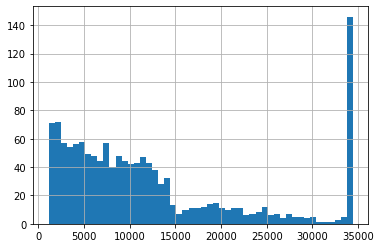

In [144]:
figure=data.claim.hist(bins=50)

[2] Bivariate analysis &
Hypothesis testing

Q-
1. How each independent feature is related with claim?     ---
2. Do older policyholders have high claim amount?          ---
2. How is the gender related with claim amount?      ----
3. Policyholders who are not falling in normal BMI range(ie BMI < 18.5 & BMI > 24.9) have higher claim amount?  ----
5. Do policyholders with higher bloodpressure have higher claim amount?   ----(>120 / >80
6. Do policyholders who are diabetic claim higher amount?            ----
7. Do policyholders with higher number of children have higher claim amount ?  
8. Do policyholders who smoke have higher claim amount?                        ----
9. Do policyholders belonging to specific region have higher claim amount or less claim amount?  ----
10. Is their correlation between independent variables? if yes how will u handle it? 
11. Which variables are correlated with claim?  ----
12. According to studies, smoking, diabetes and higher bmi leads to high bloodpressure. Do our data also shows same? If yes then what will be future reference? -----
13. Whether smoking is gender influenced?----
14. Is the BMI of females different than the BMI of males?

#What we think according to research: 

1. more age ------>     more claim amount  
2. bmi ------------>   18.5 - 24.9------>less claim amount , <18.5 & >24.9 ----> higher claim amount
3. bloodpressure --->   between 90/60 to 120/80 ------> lower claim amount, <90/60 & >120/80 -----> higher claim amount
4. diabetic -------->    yes-  higher claim amount,  no-- less claim amount
5. children -------->  more the number of children ---Higher the claim amount
6. smoker ---------> yes-higher claim amount, no-less claim amount

#Bivariate analysis of each variable with target variable

<AxesSubplot:>

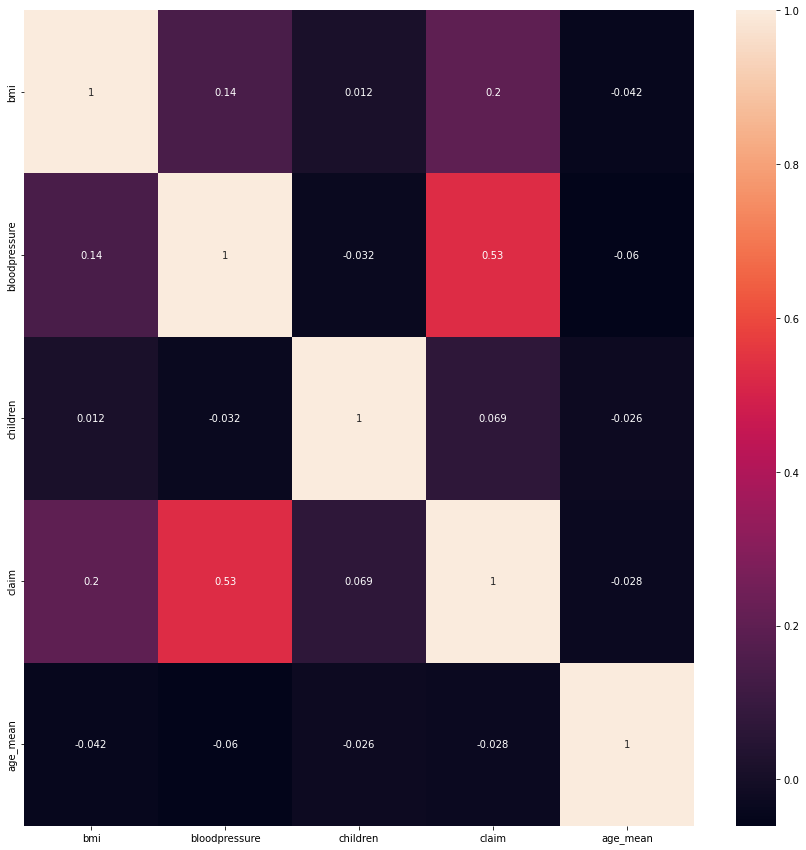

In [145]:
#correlation

plt.figure(figsize=(15, 15))
cor=df.corr()
sns.heatmap(cor,annot=True)

    here, claim is 
    highly correlated with- 
    moderate correlation with-    bloodpressure
    weak correlation with-        bmi
    no correlation with-          age, children

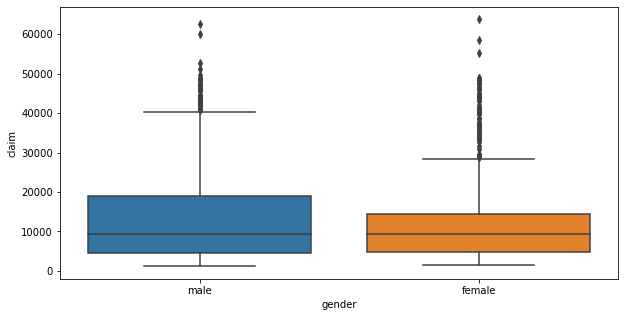

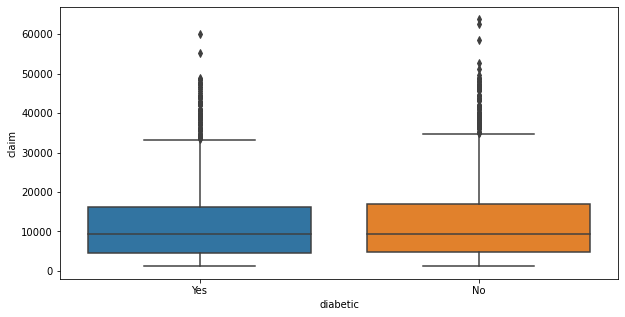

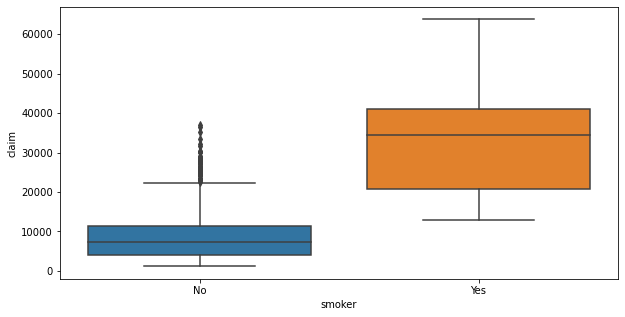

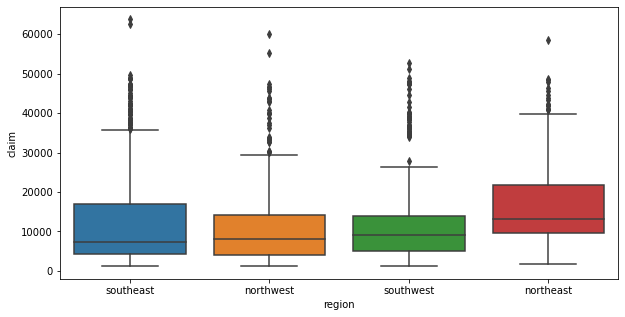

In [47]:
#Bivariate analysis of categorical variables with claim
#Visualization
for variable in categorical_variables:
    fig_dims = (10, 5)
    fig, axs = plt.subplots(nrows=1, figsize=fig_dims)
    sns.boxplot(data = df, x = df[variable], y = "claim" )

In [222]:
#Descriptive stat
for variable in categorical_variables:
    print( df.groupby([variable])['claim'].agg(["mean"]))

                mean
gender              
female  12569.578897
male    13919.790457
                  mean
diabetic              
No        13354.031991
Yes       13142.624346
                mean
smoker              
No       8421.121576
Yes     32050.231971
                   mean
region                 
northeast  16889.044719
northwest  11672.088453
southeast  12979.121502
southwest  12723.129841


Analysis:

1. Gender
Average claim amount of male is more than female. The distribution of values for male and female before median look similar but after median is looking somewhat different. Medians appear close. Male policy holder has incure more claim amount compared to female policy holder. There are lot of outliers in female policy holder. So mean(female) may be different from mean(male). Need to check this using hypothesis testing.

4. Diabetic
average claim amount for diabetic & non-diabetic is almost same. The distribution of values for diabetic and non-diabetic look similar and their medians appear close. There is very high chance there means will not be far away. So mean(diabetic) may not be different from mean(non-diabetic).

3. Smoker
average claim amount of smoker is very high than non-smoker. The distribution of values for smokers and non-smokers look dissimilar and their medians also appear away. So there is very high chance means will be away. So mean(smokers) may be different from mean(smokers)

2. Region

Average claim amount of northeast is high as compared to other 3 regions.The distribution of values looks similar for northwest and southwest but distibution for southeast and northeast does not look very similar with other two; medians for northwest, southeast, southwest also looks similar but northeast median is not very similar with other three. So. northeast may have different mean as compared with the other three regions


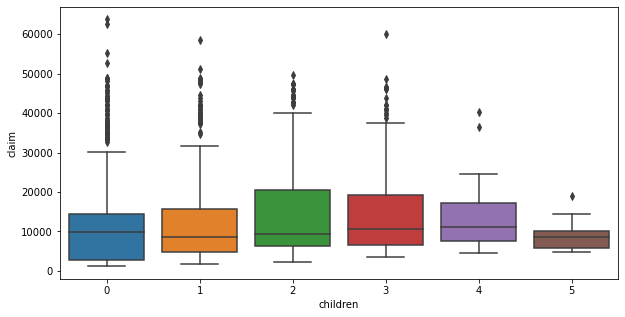

In [48]:
#bivariate analysis of discrete variables with claim
for variable in discrete_variables:
    fig_dims = (10, 5)
    fig, axs = plt.subplots(nrows=1, figsize=fig_dims)
    sns.boxplot(data = df, x = df[variable], y = "claim" )

In [49]:
df.groupby(['children'])['claim'].agg(["mean"])

,mean
children,
0,12327.993160
1,12731.171821
2,15073.564000
3,15355.318535
4,13850.656800
5,8786.035556


1. Incresing trend in claim as number of children increases upto 3 and later decreases
2. Medians do look close to each other 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


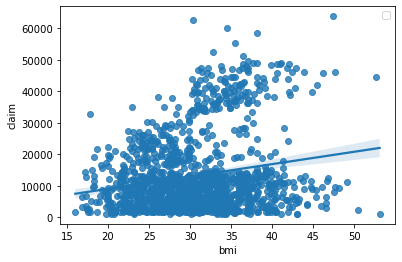

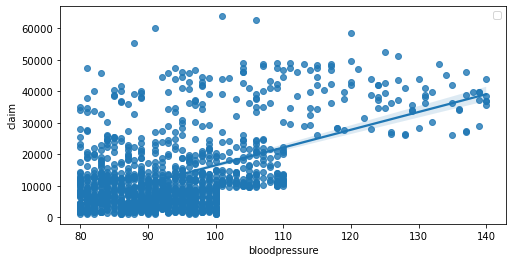

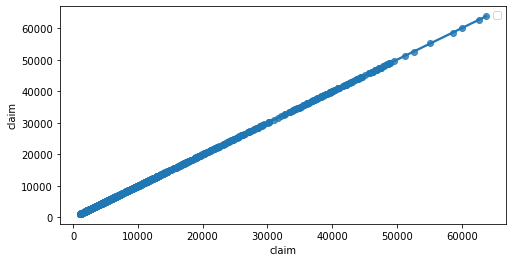

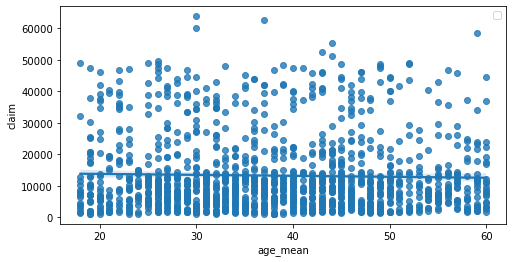

<Figure size 576x288 with 0 Axes>

In [50]:
#Bivariate analysis of continuous variables with claim
for variable in continuous_variables:
    sns.regplot(x= variable, y='claim', data=df)
    plt.legend(loc=(0))
    plt.figure(figsize=(8, 4))

Analysis:

1. BMI : 
As BMI increaing Claim amount increases

2. Bloodpressure : 
As Bloodpressure increases claim amount increases

3. Age_mean : 
Can't see any pattern. So our belief of older policyholders having high claim amount is disproved here

##### Performing hypothesis testing on some variables on which we couldn't draw any conclusion from neither visualization nor descriptive statistics

Whether claim amount is different for male & female ?

In our EDA, we did visualization & descriptive statistics between gender & claim. There we found out that Average claim amount for male is slightly higher than female. In visualization also distribution above median was not very similar. So to confirm,  we have to do hypothesis testing here

<AxesSubplot:>

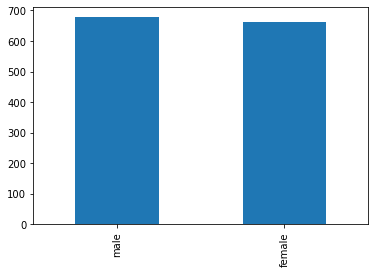

In [51]:
#Checking for balance in our data for gender category
df['gender'].value_counts().plot(kind='bar')

Male & female in our dataset are quiet balanced

In [52]:
# This is 2 independent population mean test
#Here we don't know both populations standard deviations so we will use t-test
# H0: mu_male = mu_female ie mu_male - mu_female = 0
# H1: mu_male <> mu_female  ie mu_male - mu_female <> 0   #2 tail test

In [53]:
#To know sample mean
print(df.groupby(["gender"])["claim"].agg(["mean"]))
print(df.groupby(["gender"])["claim"].agg(["count"]))
print(df.groupby(["gender"])["claim"].agg(["std"]))

                mean
gender              
female  12569.578897
male    13919.790457
        count
gender       
female    662
male      678
                 std
gender              
female  11128.703817
male    12969.700466


In [54]:
alpha =0.05 
n_male = 678    # n > 30
n_female = 662  # n > 30
mean_male = 13919.79
mean_female = 12569.57
std_male=12969.700466
std_female=12969.700466

In [55]:
t_stat= ((mean_male-mean_female)-0)/((std_male**2/n_male)+(std_female**2/n_female))**0.5
print("t_stat= ", t_stat)
df = (((std_male**2/n_male)+(std_female**2/n_female))**2/(((std_male**2/n_male)**2/(n_male-1))+ ((std_female**2/n_female)**2/(n_female-1)) ))
print("df= ", df)
t_crit_u= stats.t.isf(alpha/2, df)
print('t_crit_u=', t_crit_u)
t_crit_l= stats.t.cdf(alpha/2, df)
print('t_crit_l=', t_crit_l)

t_stat=  1.9053116936575532
df=  1337.2361475038917
t_crit_u= 1.9617395747081805
t_crit_l= 0.5099706532033178


In [56]:
p_value_u= 2*stats.t.sf(t_stat, df)
print("p_value_u= ", p_value_u)

p_value_u=  0.056953873138835424


In [57]:
if t_stat >= t_crit_u or t_stat <= t_crit_l :
    print("Reject H0. So, mu_male is not equal to mu_female ")
else:
    print("Accept H0. So, mu_male is equal to mu_female")
    
if alpha >=  p_value_u:
    print("Reject H0. So, mu_male is not equal to mu_female")
else:
    print("Accept H0. So, mu_male is equal to mu_female")

Accept H0. So, mu_male is equal to mu_female
Accept H0. So, mu_male is equal to mu_female


#### One way Anova   - claim & gender
      Null Hypothesis H0 – There is no significant difference among the groups
      Alternate Hypothesis – There is a significant difference among the groups

In [261]:
male= df[df.gender=='male'].claim
female= df[df.gender=='female'].claim

In [262]:
result= stats.kruskal(male, female)
print(result)

KruskalResult(statistic=0.06459662060873092, pvalue=0.7993729925021797)


In [238]:
# normality tests
print(stats.shapiro(male))
print(stats.shapiro(female))
print(male.skew())
print(female.skew())

ShapiroResult(statistic=0.8224581480026245, pvalue=1.028046150948747e-26)
ShapiroResult(statistic=0.8053940534591675, pvalue=1.8304706489146992e-27)
1.3381652896239644
1.7289440060985501


In [259]:
#normality test failed trying to replace outlier

#Replacing outlier

IQR = male.quantile(0.75)-male.quantile(0.25) #computing the Interquantile range to calculate the boundaries

lower_bridge=male.quantile(0.25)-(IQR*1.5)
upper_bridge=male.quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)


IQR = female.quantile(0.75)-female.quantile(0.25) #computing the Interquantile range to calculate the boundaries

lower_bridge=female.quantile(0.25)-(IQR*1.5)
upper_bridge=female.quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-17147.2825
40640.6375
-9469.128749999998
28808.981249999997


(None, None)

In [260]:
#Replacing outliers
male.loc[male>40640.6375]=40640.6375
print(male.skew())
female.loc[female>28808.981249999997]=28808.981249999997
print(female.skew())

1.152491017662747
0.921449551957857


In [241]:
# normality tests
print(stats.shapiro(male))
print(stats.shapiro(female))

ShapiroResult(statistic=0.8224731087684631, pvalue=1.030309811968182e-26)
ShapiroResult(statistic=0.8734641075134277, pvalue=9.528531598395732e-23)


In [244]:
#Applying box-cox transformation
male_Boxcox,parameters=stats.boxcox(male) 

In [252]:
# pd.dataframe(male_Boxcox)
male_Boxcox= pd.DataFrame(male_Boxcox)

In [253]:
print(male_Boxcox.skew())
print(stats.shapiro(male_Boxcox))

0   -0.027107
dtype: float64
ShapiroResult(statistic=0.9655969142913818, pvalue=1.606423154221215e-11)


In [254]:
1.606423154221215e-11 - 0.05

-0.04999999998393577

In [ ]:
#still failed normality test

In [88]:
# variance equality test
stats.levene(male, female)

LeveneResult(statistic=32.89071502830023, pvalue=1.2037315443486356e-08)

In [89]:
claim = list(male) +list(female)
Grand_mean=np.mean(claim)
print('Grand_mean= ',Grand_mean)
SST= np.sum((claim-np.mean(claim))**2)
print("SST= ", SST)
SSW= np.sum((male-np.mean(male))**2)+np.sum((female-np.mean(female))**2)
print("SSW= ", SSW) #SSW aka SSE
SSA=((np.mean(male)-Grand_mean)**2)*len(male)+((np.mean(female)-Grand_mean)**2)*len(female)
print("SSA= ", SSA)   #SSA aka SSTR
df_w= len(male) + len(female)-2
print("df_w= ", df_w)
df_bet = 2-1
print("df_bet= ", df_bet)
MS_w= SSW/df_w
MS_bet = SSA/df_bet
F_stat= MS_bet/MS_w
print("F_stat= ", F_stat)
p_value = 1 -stats.f.cdf(F_stat, dfn= df_bet, dfd= df_w)
print("p_value= ", p_value)
F_crit=stats.f.isf(0.05 , dfn = df_bet, dfd = df_w)
print("F_crit= ", F_crit)

if F_stat >= F_crit:
    print("Reject H0. So, Gender affect claim")
else:
    print("Accept H0. So, Gender do not affect claim")
if 0.05 >= p_value:
    print("Reject H0. So, Gender affect claim")
else:
    print("Accept H0. So, Gender do not affect claim")   

Grand_mean=  12527.66953824627
SST=  146175456817.01385
SSW=  144658489408.43494
SSA=  1516967408.5788407
df_w=  1338
df_bet=  1
F_stat=  14.030993970549082
p_value=  0.00018746566797722686
F_crit=  3.8484181783285654
Reject H0. So, Gender affect claim
Reject H0. So, Gender affect claim


#### One way Anova   - region & claim  

    (because here populations will be 4)
      Null Hypothesis H0 – There is no significant difference among the groups
      Alternate Hypothesis – There is a significant difference among the groups

In [263]:
n_e=df[df.region=='northeast'].claim
n_w=df[df.region=='northwest'].claim
s_e=df[df.region=='southeast'].claim
s_w=df[df.region=='southwest'].claim

In [264]:
# normality tests
print(stats.shapiro(n_e))
print(stats.shapiro(n_w))
print(stats.shapiro(s_e))
print(stats.shapiro(s_w))

ShapiroResult(statistic=0.8777790069580078, pvalue=1.1079376348657743e-12)
ShapiroResult(statistic=0.8072879314422607, pvalue=4.46119248488647e-20)
ShapiroResult(statistic=0.7731466889381409, pvalue=2.240676768100462e-24)
ShapiroResult(statistic=0.7853246927261353, pvalue=5.0216186590010836e-20)


In [265]:
# variance equality test
stats.levene(n_e, n_w, s_e, s_w)

LeveneResult(statistic=1.3611645100759595, pvalue=0.25308088982987537)

In [266]:
#normality test failed trying to replace outlier

#Replacing outlier

IQR = n_e.quantile(0.75)- n_e.quantile(0.25) #computing the Interquantile range to calculate the boundaries

lower_bridge=n_e.quantile(0.25)-(IQR*1.5)
upper_bridge=n_e.quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)


IQR = n_w.quantile(0.75)-n_w.quantile(0.25) #computing the Interquantile range to calculate the boundaries

lower_bridge=n_w.quantile(0.25)-(IQR*1.5)
upper_bridge=n_w.quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

IQR = s_e.quantile(0.75)-s_e.quantile(0.25) #computing the Interquantile range to calculate the boundaries
lower_bridge=s_e.quantile(0.25)-(IQR*1.5)
upper_bridge=s_e.quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

IQR = s_w.quantile(0.75)-s_w.quantile(0.25) #computing the Interquantile range to calculate the boundaries
lower_bridge=s_w.quantile(0.25)-(IQR*1.5)
upper_bridge=s_w.quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)


-8770.615000000003
40007.38500000001
-11301.315
29588.165
-14486.6575
35778.6025
-8185.1799999999985
27053.64


(None, None)

In [267]:
#Replacing outliers
n_e.loc[n_e>40007.38500000001]=40007.38500000001
print(n_e.skew())
n_w.loc[n_w>29588.165]=29588.165
print(n_w.skew())
s_e.loc[s_e>35778.6025]=35778.6025
print(s_e.skew())
s_w.loc[s_w>27053.64]=27053.64
print(s_w.skew())

0.9458617418526478
1.002832656562103
1.2028924517691602
0.9018988416957259


In [268]:
# normality tests
print(stats.shapiro(n_e))
print(stats.shapiro(n_w))
print(stats.shapiro(s_e))
print(stats.shapiro(s_w))

ShapiroResult(statistic=0.8807350993156433, pvalue=1.660364445758844e-12)
ShapiroResult(statistic=0.8579744696617126, pvalue=2.6515337401113856e-17)
ShapiroResult(statistic=0.7898043990135193, pvalue=1.4207501654444395e-23)
ShapiroResult(statistic=0.8693127632141113, pvalue=1.1790296285129915e-15)


In [269]:
#applying log transformation
n_e=np.log(n_e)
n_w=np.log(n_w)
s_e=np.log(s_e)
s_w=np.log(s_w)

In [271]:
print(n_e.skew())
print(n_w.skew())
print(s_e.skew())
print(s_w.skew())

-0.6589554814621934
-0.24482786259078856
0.04566305500594509
-0.3483843915030724


In [272]:
# normality tests
print(stats.shapiro(n_e))
print(stats.shapiro(n_w))
print(stats.shapiro(s_e))
print(stats.shapiro(s_w))

ShapiroResult(statistic=0.9347296953201294, pvalue=1.3002543042262005e-08)
ShapiroResult(statistic=0.9611306190490723, pvalue=5.3014218792668544e-08)
ShapiroResult(statistic=0.961383581161499, pvalue=1.9758752412002423e-09)
ShapiroResult(statistic=0.9597620964050293, pvalue=1.304681802594132e-07)


In [93]:
claim = list(n_e) +list(n_w) + list(s_e) + list(s_w)
Grand_mean=np.mean(claim)
print('Grand_mean= ', Grand_mean)
SST= np.sum((claim-np.mean(claim))**2)
print("SST= ", SST)
SSW= np.sum((n_e-np.mean(n_e))**2) + np.sum((n_w-np.mean(n_w))**2) +  np.sum((s_e-np.mean(s_e))**2) +  np.sum((s_w-np.mean(s_w))**2)
print("SSW= ", SSW) #SSW aka SSE
SSA=((np.mean(n_e)-Grand_mean)**2)*len(n_e)+((np.mean(n_w)-Grand_mean)**2)*len(n_w) +((np.mean(s_e)-Grand_mean)**2)*len(s_e) + ((np.mean(s_w)-Grand_mean)**2)*len(s_w)
print("SSA= ", SSA)   #SSA aka SSTR
df_w= len(n_e) + len(n_w)+ len(s_e) + len(s_w) -4
print("df_w= ", df_w)
df_bet = 4-1
print("df_bet= ", df_bet)
MS_w= SSW/df_w
MS_bet = SSA/df_bet
F_stat= MS_bet/MS_w
print("F_stat= ", F_stat)
p_value = 1 -stats.f.cdf(F_stat, dfn= df_bet, dfd= df_w)
print("p_value= ", p_value)
F_crit=stats.f.isf(0.05 , dfn = df_bet, dfd = df_w)
print("F_crit= ", F_crit)

if F_stat >= F_crit:
    print("Reject H0. So, region affect claim")
else:
    print("Accept H0. So, region do not affect claim")
if 0.05 >= p_value:
    print("Reject H0. So, region affect claim")
else:
    print("Accept H0. So, region do not affect claim") 

Grand_mean=  13252.745641791045
SST=  196354491084.85095
SSW=  192306618698.9761
SSA=  4047872385.874839
df_w=  1336
df_bet=  3
F_stat=  9.37384534502864
p_value=  3.923910319336699e-06
F_crit=  2.611563227252709
Reject H0. So, region affect claim
Reject H0. So, region affect claim


#### One way Anova   - children & claim 
      Null Hypothesis H0 – There is no significant difference among the groups
      Alternate Hypothesis – There is a significant difference among the groups

In [94]:
c_0=df[df.children==0].claim
c_1=df[df.children==1].claim
c_2=df[df.children==2].claim
c_3=df[df.children==3].claim
c_4=df[df.children==4].claim
c_5=df[df.children==5].claim

In [95]:
# normality tests
print(stats.shapiro(c_0))
print(stats.shapiro(c_1))
print(stats.shapiro(c_2))
print(stats.shapiro(c_3))
print(stats.shapiro(c_4))
print(stats.shapiro(c_5))

ShapiroResult(statistic=0.8162412643432617, pvalue=4.098972046449151e-25)
ShapiroResult(statistic=0.7752900123596191, pvalue=8.85195296399475e-21)
ShapiroResult(statistic=0.7951909303665161, pvalue=4.783164282026247e-17)
ShapiroResult(statistic=0.8057760000228882, pvalue=3.635229053541855e-13)
ShapiroResult(statistic=0.8294430375099182, pvalue=0.0007348806248046458)
ShapiroResult(statistic=0.890959620475769, pvalue=0.040083467960357666)


In [96]:
# variance equality test
stats.levene(c_0, c_1, c_2, c_3, c_4, c_5)

LeveneResult(statistic=2.0829171575561305, pvalue=0.06501341527146635)

In [97]:
claim = list(c_0) +list(c_1) + list(c_2) + list(c_3) + list(c_4) + list(c_5)
Grand_mean=np.mean(claim)
print("Grand_mean= ", Grand_mean)
SST= np.sum((claim-np.mean(claim))**2)
print("SST= ", SST)
SSW= np.sum((c_0-np.mean(c_0))**2) + np.sum((c_1-np.mean(c_1))**2) + np.sum((c_2-np.mean(c_2))**2) +  np.sum((c_3-np.mean(c_3))**2)+np.sum((c_4-np.mean(c_4))**2) +np.sum((c_5-np.mean(c_5))**2)
print("SSW= ", SSW) #SSW aka SSE
SSA=((np.mean(c_0)-Grand_mean)**2)*len(c_0)+((np.mean(c_1)-Grand_mean)**2)*len(c_1) +((np.mean(c_2)-Grand_mean)**2)*len(c_2) + ((np.mean(c_3)-Grand_mean)**2)*len(c_3)+ ((np.mean(c_4)-Grand_mean)**2)*len(c_4) +((np.mean(c_5)-Grand_mean)**2)*len(c_5)
print("SSA= ", SSA)   #SSA aka SSTR
df_w= len(c_0) + len(c_1)+ len(c_2) + len(c_3) +len(c_4) + len(c_5) -6
print("df_w= ", df_w)
df_bet = 6-1
print("df_bet= ", df_bet)
MS_w= SSW/df_w
MS_bet = SSA/df_bet
F_stat= MS_bet/MS_w
print("F_stat= ", F_stat)
p_value = 1 -stats.f.cdf(F_stat, dfn= df_bet, dfd= df_w)
print("p_value= ", p_value)
F_crit=stats.f.isf(0.05 , dfn = df_bet, dfd = df_w)
print("F_crit= ", F_crit)

if F_stat >= F_crit:
    print("Reject H0. So, children affect claim")
else:
    print("Accept H0. So, children do not affect claim")
if 0.05 >= p_value:
    print("Reject H0. So, children affect claim")
else:
    print("Accept H0. So, children do not affect claim") 

Grand_mean=  13252.745641791045
SST=  196354491084.85095
SSW=  193915950978.19376
SSA=  2438540106.65716
df_w=  1334
df_bet=  5
F_stat=  3.3550746969200684
p_value=  0.005127937459065368
F_crit=  2.220807397364003
Reject H0. So, children affect claim
Reject H0. So, children affect claim


After doing EDA & hypothesis testing we conclude with *sureity* that variables affecting claim are-

gender, smoker, region, children, bmi, bloodpressure

variables not affecting claim are- diabetic

In confusion- age_mean

Uptil now, we have done univariate analysis for all variables. & Bivariate of all variables with claim 
Now we will do bivariate of all variables with gender, region & age as many health conditions such as bmi, bloodpressure, diabetic, etc depend on this factors.
Also we will do bivariate of smoker with other variables

###### gender

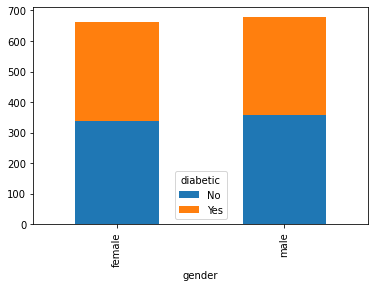

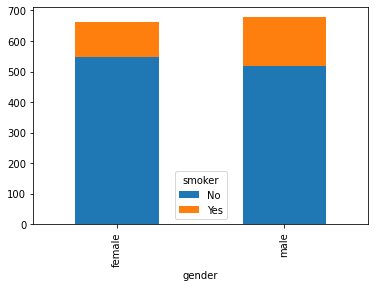

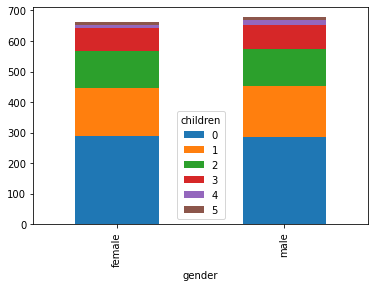

In [98]:
#bivariate analysis of categorical & discrete variables with gender
#Visualization
for variable in ['diabetic', 'smoker', 'children']:
    pd.crosstab(df['gender'], df[variable]).plot(kind='bar', stacked=True)

In [99]:
#Descriptive stats
for variable in ['diabetic', 'smoker', 'children']:
    print(pd.crosstab(index=df['gender'], columns=df[variable],normalize="index"))
    print("")

diabetic        No       Yes
gender                      
female    0.512085  0.487915
male      0.529499  0.470501

smoker        No       Yes
gender                    
female  0.826284  0.173716
male    0.765487  0.234513

children         0         1         2         3         4         5
gender                                                              
female    0.436556  0.238671  0.179758  0.116314  0.016616  0.012085
male      0.423304  0.244838  0.178466  0.117994  0.020649  0.014749



    Non-diabetic & diabetic in male & female are almost same
    Number of smokers and non-smokers in both male & female is not same. Smokers are more in male
    Number of claims made by female & male who don't smoke are more than who smoke
    Number of male & female in different-different region is different
    distribution of children in male & female almost looks same

###### Performing hypothesis on gender & smoker.

    Whether smoking is gender influenced? 
        H0: Gender do not influences smoking
        Ha: Gender do influences smoking

Performing chi-square test of independence

In [100]:
data_ht= df.copy()
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data_ht['gender']= le.fit_transform(data_ht['gender'])  #male is 1 female is 0
data_ht['smoker']= le.fit_transform(data_ht['smoker'])  #smoker is 1 non-smoker is 0

In [101]:
obs_table= pd.crosstab(data_ht['smoker'], data_ht['gender'])
obs_table=obs_table.values
print("obs_table= \n", obs_table)
gender_tot= np.array([len(data_ht['gender'])-sum(data_ht['gender']), sum(data_ht['gender'])])
smoking_tot=np.array([len(data_ht['smoker'])-sum(data_ht['smoker']), sum(data_ht['smoker'] )])
total=sum(gender_tot)
print("gender_tot= ", gender_tot) 
print("smoking_tot= ", smoking_tot) 
print("total=       ", total) 
exp_table= [  gender_tot*smoking_tot[0]/total,
    gender_tot*smoking_tot[1]/total ]
print("exp_table= ", exp_table)
#chi statistc
Chi_stat= np.sum(((obs_table[0,:]- exp_table[0])**2)/exp_table[0]) + np.sum(((obs_table[1,:]-exp_table[1])**2)/exp_table[1])
print("Chi_stat= ", Chi_stat)
#degrees of freedom
no_of_rows= len(smoking_tot)
no_of_columns=len(gender_tot)
df=(no_of_rows-1)*(no_of_columns-1)
print('df= ', df)
#considering 0.05 significance level
alpha=0.05
Chi_crit=stats.chi2.isf(0.05, df)
print("Chi_crit= ", Chi_crit)
p_value= stats.chi2.sf(Chi_stat, df)
print("p_value= ", p_value)
if Chi_stat >= Chi_crit:
    print("Reject H0. There is a relationship between gender and smoking")
else:
    print("Accept H0. There is no relationship between gender and smoking")
    
if alpha >= p_value:
    print("Reject H0. There is a relationship between  gender and smoking")
else:
    print("Accept H0. There is no relationship between gender and smoking")

obs_table= 
 [[547 519]
 [115 159]]
gender_tot=  [662 678]
smoking_tot=  [1066  274]
total=        1340
exp_table=  [array([526.6358209, 539.3641791]), array([135.3641791, 138.6358209])]
Chi_stat=  7.611193450221007
df=  1
Chi_crit=  3.8414588206941285
p_value=  0.005800707916012198
Reject H0. There is a relationship between gender and smoking
Reject H0. There is a relationship between  gender and smoking


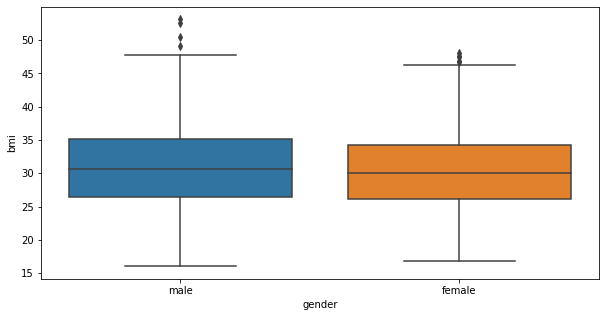

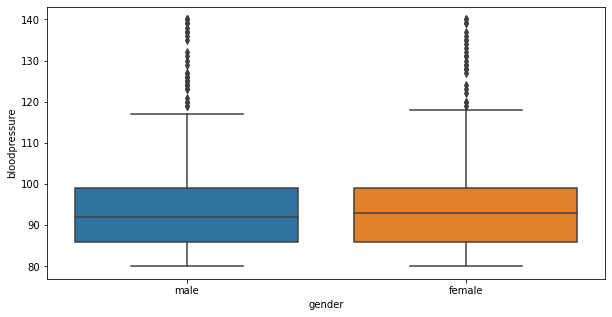

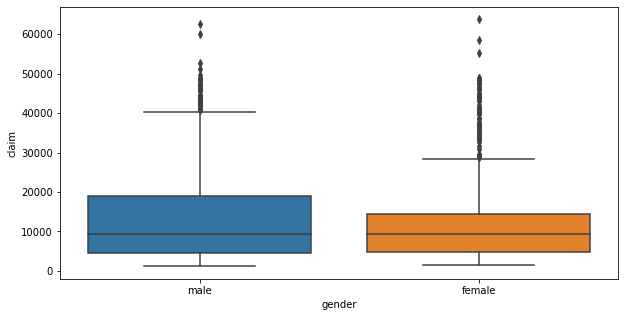

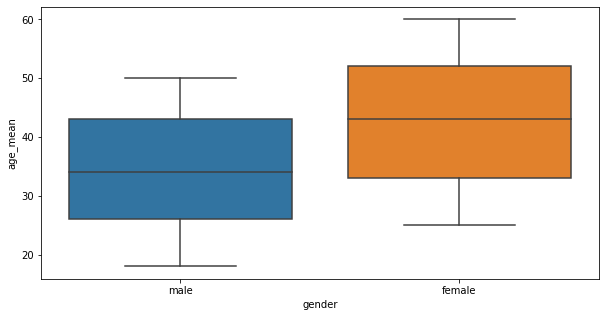

In [146]:
#Bivariate analysis of continuous variables with gender
#visualization
for variable in continuous_variables:
    fig_dims = (10, 5)
    fig, axs = plt.subplots(nrows=1, figsize=fig_dims)
    sns.boxplot(data = df, x = df['gender'], y = df[variable] )

In [147]:
#Descriptive stat
for variable in continuous_variables:
    print(variable, df.groupby(["gender"])[variable].agg(["mean"]))
    print("")

bmi              mean
gender           
female  30.379758
male    30.951327

bloodpressure              mean
gender           
female  94.013595
male    94.297935

claim                 mean
gender              
female  12569.578897
male    13919.790457

age_mean              mean
gender           
female  42.483384
male    33.777866



    Average BMI of male & female are almost same. Distribution also looks similar.
    Average bloodpressure of male & female is almost same. Distribution is also similar
    Distribution of age for male & female is not same. Average age of female is higher than male. 

#### One way Anova   - Gender & age 
      Null Hypothesis H0 – There is no significant difference among the groups
      Alternate Hypothesis – There is a significant difference among the groups

In [148]:
male= df[df.gender=='male'].age_mean
female= df[df.gender=='female'].age_mean

In [149]:
# normality tests
print(stats.shapiro(male))
print(stats.shapiro(female))
print(male.skew())
print(female.skew())

ShapiroResult(statistic=0.9484843611717224, pvalue=1.267260391947262e-14)
ShapiroResult(statistic=0.9434595704078674, pvalue=3.4559477878732224e-15)
0.007301693236976324
-0.017167261179384916


In [150]:
# variance equality test
stats.levene(male, female)

LeveneResult(statistic=15.08572039716639, pvalue=0.00010775584945998541)

In [151]:
age = list(male) +list(female)
Grand_mean=np.mean(age)
print('Grand_mean= ',Grand_mean)
SST= np.sum((age-np.mean(age))**2)
print("SST= ", SST)
SSW= np.sum((male-np.mean(male))**2)+np.sum((female-np.mean(female))**2)
print("SSW= ", SSW) #SSW aka SSE
SSA=((np.mean(male)-Grand_mean)**2)*len(male)+((np.mean(female)-Grand_mean)**2)*len(female)
print("SSA= ", SSA)   #SSA aka SSTR
df_w= len(male) + len(female)-2
print("df_w= ", df_w)
df_bet = 2-1
print("df_bet= ", df_bet)
MS_w= SSW/df_w
MS_bet = SSA/df_bet
F_stat= MS_bet/MS_w
print("F_stat= ", F_stat)
p_value = 1 - stats.f.cdf(F_stat, dfn= df_bet, dfd= df_w)
print("p_value= ", p_value)
F_crit=stats.f.isf(0.05 , dfn = df_bet, dfd = df_w)
print("F_crit= ", F_crit)

if F_stat >= F_crit:
    print("Reject H0. So, Gender affect age")
else:
    print("Accept H0. So, Gender do not affect age")
if 0.05 >= p_value:
    print("Reject H0. So, Gender affect age")
else:
    print("Accept H0. So, Gender do not affect age") 

Grand_mean=  38.078651685393254
SST=  164448.74157303368
SSW=  139064.0393649946
SSA=  25384.70220803915
df_w=  1338
df_bet=  1
F_stat=  244.23806261812095
p_value=  1.1102230246251565e-16
F_crit=  3.8484181783285654
Reject H0. So, Gender affect age
Reject H0. So, Gender affect age


###### Region

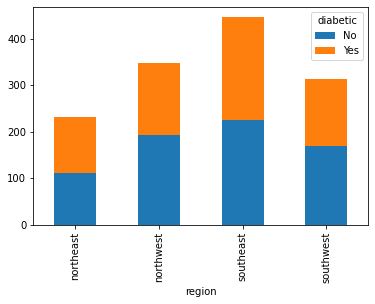

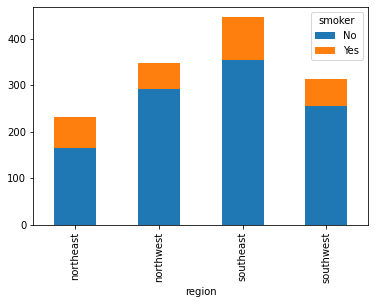

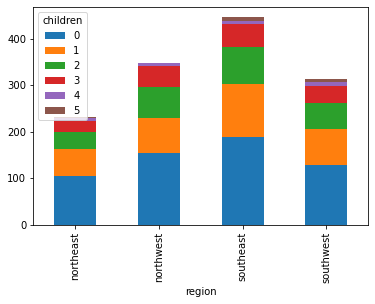

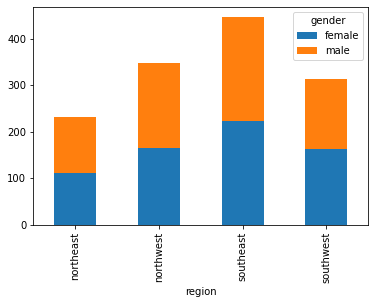

In [152]:
#Bivariate analysis of discrete & categorical variables with region
#Visualization
for variable in ['diabetic', 'smoker', 'children', 'gender']:
    ax=pd.crosstab(df['region'], df[variable]).plot(kind='bar', stacked=True)

In [153]:
#Descriptive stats
for variable in ['diabetic', 'smoker', 'children', 'gender']:
    print(pd.crosstab(index=df['region'], columns=df[variable],normalize="index"))
    print("")

diabetic         No       Yes
region                       
northeast  0.476190  0.523810
northwest  0.550143  0.449857
southeast  0.506726  0.493274
southwest  0.541401  0.458599

smoker           No       Yes
region                       
northeast  0.709957  0.290043
northwest  0.833811  0.166189
southeast  0.795964  0.204036
southwest  0.815287  0.184713

children          0         1         2         3         4         5
region                                                               
northeast  0.454545  0.246753  0.160173  0.108225  0.025974  0.004329
northwest  0.441261  0.217765  0.189112  0.131805  0.017192  0.002865
southeast  0.423767  0.255605  0.179372  0.109865  0.013453  0.017937
southwest  0.407643  0.245223  0.181529  0.117834  0.022293  0.025478

gender       female      male
region                       
northeast  0.484848  0.515152
northwest  0.469914  0.530086
southeast  0.502242  0.497758
southwest  0.515924  0.484076



    Different distribution of diabetic condition for different region. Need to do hypothesis
    Different distribution of smokers for different region. Proportion of smokers is more in northeast region(may be a reason behind northeast having higher claim amount). Need to do hypothesis
    Distribution of childrens in different regions looks same. 
    Distribution of gender in different region looks same.

##### Performing hypothesis on region & diabetic condition

 Whether diabetic condition is region influenced? 
        H0: region do not influences diabetic condition
        Ha: region do influences diabetic condition

In [154]:
data_ht= df.copy()
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data_ht['region']= le.fit_transform(data_ht['region'])  
data_ht['diabetic']= le.fit_transform(data_ht['diabetic'])  

In [175]:
obs_table= pd.crosstab(data_ht['diabetic'], data_ht['region'])
obs_table=obs_table.values
print("obs_table= \n", obs_table)
region_tot= obs_table[0] + obs_table[1]
diabetic_tot=obs_table[:, 0] + obs_table[:, 1] + obs_table[:, 2] +obs_table[:, 3]  
total=sum(region_tot)
print("region_tot= ", region_tot) 
print("diabetic_tot= ", diabetic_tot) 
print("total=       ", total) 
exp_table= [region_tot*diabetic_tot[0]/total,
    region_tot*diabetic_tot[1]/total ]
print("exp_table= ", exp_table)
#chi statistc
Chi_stat= np.sum(((obs_table[0,:]- exp_table[0])**2)/exp_table[0]) + np.sum(((obs_table[1,:]-exp_table[1])**2)/exp_table[1])
print("Chi_stat= ", Chi_stat)
#degrees of freedom
no_of_rows= len(diabetic_tot)
no_of_columns=len(region_tot)
df=(no_of_rows-1)*(no_of_columns-1)
print('df= ', df)
#considering 0.05 significance level
alpha=0.05
Chi_crit=stats.chi2.isf(0.05, df)
print("Chi_crit= ", Chi_crit)
p_value= stats.chi2.sf(Chi_stat, df)
print("p_value= ", p_value)
if Chi_stat >= Chi_crit:
    print("Reject H0. There is a relationship between region and diabetic")
else:
    print("Accept H0. There is no relationship between region and diabetic")
    
if alpha >= p_value:
    print("Reject H0. There is a relationship between  region and diabetic")
else:
    print("Accept H0. There is no relationship between region and diabetic")

obs_table= 
 [[110 192 226 170]
 [121 157 220 144]]
region_tot=  [231 349 446 314]
diabetic_tot=  [698 642]
total=        1340
exp_table=  [array([120.32686567, 181.79253731, 232.31940299, 163.56119403]), array([110.67313433, 167.20746269, 213.68059701, 150.43880597])]
Chi_stat=  3.933994087403091
df=  3
Chi_crit=  7.814727903251178
p_value=  0.2686803522162552
Accept H0. There is no relationship between region and diabetic
Accept H0. There is no relationship between region and diabetic


##### Performing hypothesis on region & smoking

     Whether smoking is region influenced? 
            H0: region do not influences smoking
            Ha: region do influences smoking 

In [182]:
# data_h= df.copy()
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data_ht['region']= le.fit_transform(data_ht['region']) 
data_ht['smoker']= le.fit_transform(data_ht['smoker']) 

In [186]:
obs_table= pd.crosstab(data_ht['smoker'], data_ht['region'])
print(obs_table)
obs_table=obs_table.values
print("obs_table= \n", obs_table)
region_tot= obs_table[0] + obs_table[1]
smoker_tot=obs_table[:, 0] + obs_table[:, 1] + obs_table[:, 2] +obs_table[:, 3]  
total=sum(region_tot)
print("region_tot= ", region_tot) 
print("smoker_tot= ", smoker_tot) 
print("total=       ", total) 
exp_table= [region_tot*smoker_tot[0]/total,
    region_tot*smoker_tot[1]/total ]
print("exp_table= ", exp_table)
#chi statistc
Chi_stat= np.sum(((obs_table[0,:]- exp_table[0])**2)/exp_table[0]) + np.sum(((obs_table[1,:]-exp_table[1])**2)/exp_table[1])
print("Chi_stat= ", Chi_stat)
#degrees of freedom
no_of_rows= len(smoker_tot)
no_of_columns=len(region_tot)
df=(no_of_rows-1)*(no_of_columns-1)
print('df= ', df)
#considering 0.05 significance level
alpha=0.05
Chi_crit=stats.chi2.isf(0.05, df)
print("Chi_crit= ", Chi_crit)
p_value= stats.chi2.sf(Chi_stat, df)
print("p_value= ", p_value)
if Chi_stat >= Chi_crit:
    print("Reject H0. There is a relationship between region and smoker")
else:
    print("Accept H0. There is no relationship between region and smoker")
    
if alpha >= p_value:
    print("Reject H0. There is a relationship between  region and smoker")
else:
    print("Accept H0. There is no relationship between region and smoker")

region    0    1    2    3
smoker                    
0       164  291  355  256
1        67   58   91   58
obs_table= 
 [[164 291 355 256]
 [ 67  58  91  58]]
region_tot=  [231 349 446 314]
smoker_tot=  [1066  274]
total=        1340
exp_table=  [array([183.76567164, 277.63731343, 354.80298507, 249.79402985]), array([47.23432836, 71.36268657, 91.19701493, 64.20597015])]
Chi_stat=  14.297002475827984
df=  3
Chi_crit=  7.814727903251178
p_value=  0.0025275302069715615
Reject H0. There is a relationship between region and smoker
Reject H0. There is a relationship between  region and smoker


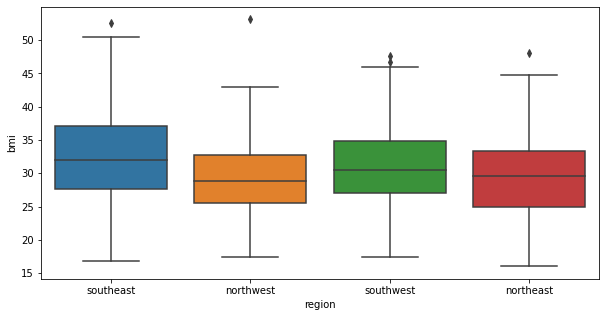

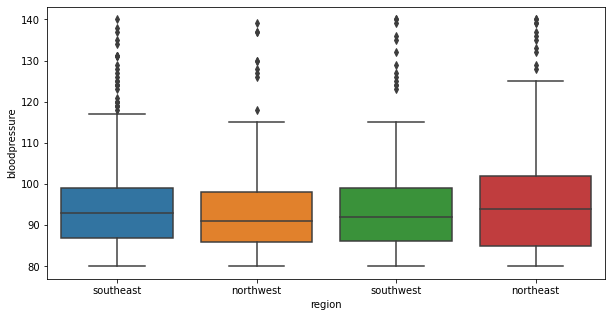

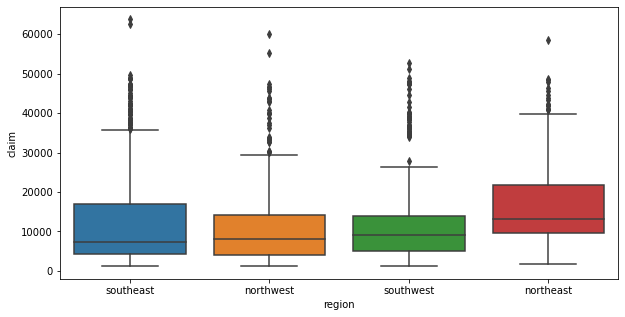

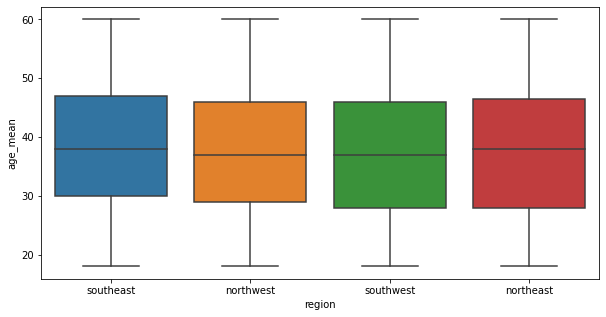

In [131]:
#Bivariate analysis of continuous variables with region
#visualization
for variable in continuous_variables:
    fig_dims = (10, 5)
    fig, axs = plt.subplots(nrows=1, figsize=fig_dims)
    sns.boxplot(data = df, x = 'region', y = variable )

In [130]:
#Descriptive stat
for variable in continuous_variables:
    print(variable , df.groupby(["region"])[variable].agg(["mean"]))
    print("")

bmi                 mean
region              
northeast  29.363203
northwest  29.267335
southeast  32.365695
southwest  30.777389

bloodpressure                 mean
region              
northeast  95.722944
northwest  92.965616
southeast  94.334081
southwest  94.079618

claim                    mean
region                 
northeast  16889.044719
northwest  11672.088453
southeast  12979.121502
southwest  12723.129841

age_mean                 mean
region              
northeast  38.064935
northwest  37.711503
southeast  38.551746
southwest  37.824841



    Distribution of bmi in northeast and southwest looks similar. Average BMI of southeast policyhilders is slightly higher than other regions.But for 2 regions bmi is in obese category. So need to check this by hypothesis testing. 
    Distribution of bloodpressure in south regions looks similar but north regions do not show the same
    Age of policyholders across different region is almost similar. Average age is also similar.

#### One way Anova   - region & bmi 
      Null Hypothesis H0 – There is no significant difference among the groups
      Alternate Hypothesis – There is a significant difference among the groups

In [229]:
southeast= df[df.region=='southeast'].bmi
northeast= df[df.region=='northeast'].bmi
northwest= df[df.region=='northwest'].bmi
southwest= df[df.region=='southwest'].bmi

In [230]:
# normality tests
print(stats.shapiro(southeast))
print(stats.shapiro(northeast))
print(stats.shapiro(northwest))
print(stats.shapiro(southwest))

ShapiroResult(statistic=0.9925739765167236, pvalue=0.025977209210395813)
ShapiroResult(statistic=0.9931576251983643, pvalue=0.3671373426914215)
ShapiroResult(statistic=0.9899710416793823, pvalue=0.017298316583037376)
ShapiroResult(statistic=0.9955127835273743, pvalue=0.5042665004730225)


In [231]:
# variance equality test
stats.levene(southeast, northeast, northwest, southwest)

LeveneResult(statistic=6.795601342849626, pvalue=0.00015134241386061668)

In [232]:
bmi = list(southeast) +list(northeast) +list(northwest) +list(southwest)
Grand_mean=np.mean(bmi)
print('Grand_mean= ',Grand_mean)
SST= np.sum((bmi-np.mean(bmi))**2)
print("SST= ", SST)
SSW= np.sum((southeast-np.mean(southeast))**2)+np.sum((northeast-np.mean(northeast))**2)+np.sum((southwest-np.mean(southwest))**2)+np.sum((northwest-np.mean(northwest))**2)
print("SSW= ", SSW) #SSW aka SSE
SSA=((np.mean(southeast)-Grand_mean)**2)*len(southeast)+((np.mean(northeast)-Grand_mean)**2)*len(northeast)+((np.mean(northwest)-Grand_mean)**2)*len(northwest)+((np.mean(southwest)-Grand_mean)**2)*len(southwest)
print("SSA= ", SSA)   #SSA aka SSTR
df_w= len(southeast) +len(northeast) +len(northwest) +len(southwest)-4
print("df_w= ", df_w)
df_bet = 4-1
print("df_bet= ", df_bet)
MS_w= SSW/df_w
MS_bet = SSA/df_bet
F_stat= MS_bet/MS_w
print("F_stat= ", F_stat)
p_value = 1 - stats.f.cdf(F_stat, dfn= df_bet, dfd= df_w)
print("p_value= ", p_value)
F_crit=stats.f.isf(0.05 , dfn = df_bet, dfd = df_w)
print("F_crit= ", F_crit)

if F_stat >= F_crit:
    print("Reject H0. So, region affect bmi")
else:
    print("Accept H0. So, region do not affect bmi")
if 0.05 >= p_value:
    print("Reject H0. So, region affect bmi")
else:
    print("Accept H0. So, region do not affect bmi") 

Grand_mean=  30.668955223880598
SST=  49934.26853731343
SSW=  47567.09944434161
SSA=  2367.1690929718015
df_w=  1336
df_bet=  3
F_stat=  22.161942078689776
p_value=  5.2513549064769904e-14
F_crit=  2.611563227252709
Reject H0. So, region affect bmi
Reject H0. So, region affect bmi


#### One way Anova - region & bloodpressure
      Null Hypothesis H0 – There is no significant difference among the groups
      Alternate Hypothesis – There is a significant difference among the groups

In [233]:
southeast= df[df.region=='southeast'].bloodpressure
northeast= df[df.region=='northeast'].bloodpressure
northwest= df[df.region=='northwest'].bloodpressure
southwest= df[df.region=='southwest'].bloodpressure

In [234]:
# normality tests
print(stats.shapiro(southeast))
print(stats.shapiro(northeast))
print(stats.shapiro(northwest))
print(stats.shapiro(southwest))

ShapiroResult(statistic=0.8793475031852722, pvalue=3.634427297946703e-18)
ShapiroResult(statistic=0.8851175904273987, pvalue=3.063362280855686e-12)
ShapiroResult(statistic=0.8906420469284058, pvalue=4.1872235184898556e-15)
ShapiroResult(statistic=0.8779828548431396, pvalue=4.266288961918361e-15)


In [235]:
# variance equality test
stats.levene(southeast, northeast, northwest, southwest)

LeveneResult(statistic=5.6847330893067305, pvalue=0.0007227842366044349)

In [236]:
bloodpressure = list(southeast) +list(northeast) +list(northwest) +list(southwest)
Grand_mean=np.mean(bloodpressure)
print('Grand_mean= ',Grand_mean)
SST= np.sum((bloodpressure-np.mean(bloodpressure))**2)
print("SST= ", SST)
SSW= np.sum((southeast-np.mean(southeast))**2)+np.sum((northeast-np.mean(northeast))**2)+np.sum((southwest-np.mean(southwest))**2)+np.sum((northwest-np.mean(northwest))**2)
print("SSW= ", SSW) #SSW aka SSE
SSA=((np.mean(southeast)-Grand_mean)**2)*len(southeast)+((np.mean(northeast)-Grand_mean)**2)*len(northeast)+((np.mean(northwest)-Grand_mean)**2)*len(northwest)+((np.mean(southwest)-Grand_mean)**2)*len(southwest)
print("SSA= ", SSA)   #SSA aka SSTR
df_w= len(southeast) +len(northeast) +len(northwest) +len(southwest)-4
print("df_w= ", df_w)
df_bet = 4-1
print("df_bet= ", df_bet)
MS_w= SSW/df_w
MS_bet = SSA/df_bet
F_stat= MS_bet/MS_w
print("F_stat= ", F_stat)
p_value = 1 - stats.f.cdf(F_stat, dfn= df_bet, dfd= df_w)
print("p_value= ", p_value)
F_crit=stats.f.isf(0.05 , dfn = df_bet, dfd = df_w)
print("F_crit= ", F_crit)

if F_stat >= F_crit:
    print("Reject H0. So, region affect bloodpressure")
else:
    print("Accept H0. So, region do not affect bloodpressure")
if 0.05 >= p_value:
    print("Reject H0. So, region affect bloodpressure")
else:
    print("Accept H0. So, region do not affect bloodpressure") 

Grand_mean=  94.15746268656716
SST=  175077.7753731343
SSW=  174000.08731805283
SSA=  1077.6880550814953
df_w=  1336
df_bet=  3
F_stat=  2.7582193851759382
p_value=  0.04107671509691935
F_crit=  2.611563227252709
Reject H0. So, region affect bloodpressure
Reject H0. So, region affect bloodpressure


###### Age

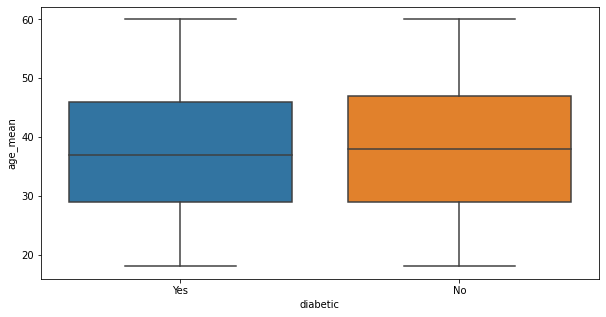

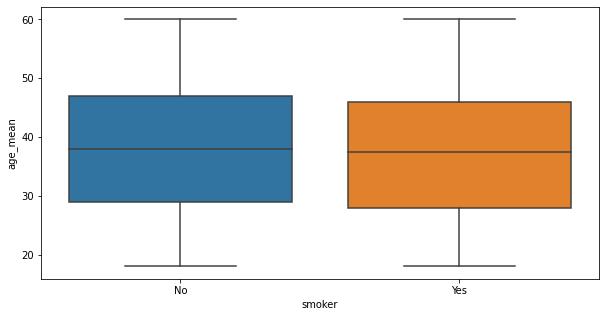

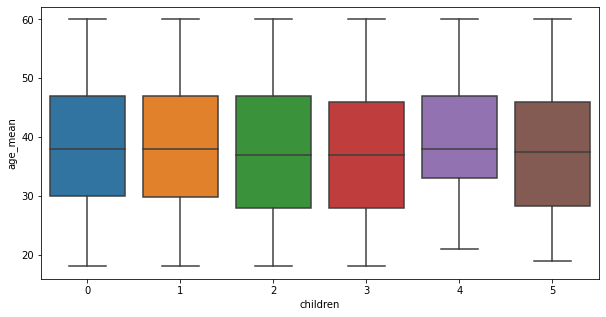

In [133]:
#Bivariate analysis of categorical variables with age
#Visualization
for variable in ['diabetic', 'smoker', 'children']:
#     fig_dims = (10, 5)
    fig, axs = plt.subplots(nrows=1, figsize=fig_dims)
    sns.boxplot(data = df, x = df[variable], y = "age_mean" )

In [132]:
#Descriptive stat
for variable in ['diabetic', 'smoker', 'children']:
    print( df.groupby([variable])['age_mean'].agg(["mean"]))


               mean
diabetic           
No        38.355526
Yes       37.777626
             mean
smoker           
No      38.257405
Yes     37.383212
               mean
children           
0         38.273252
1         38.574074
2         37.325000
3         37.318471
4         39.480000
5         37.666667


No handles with labels found to put in legend.
No handles with labels found to put in legend.


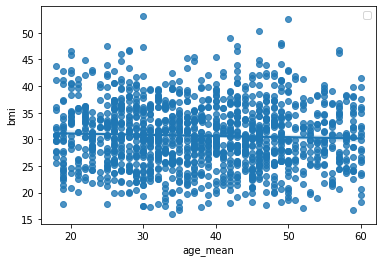

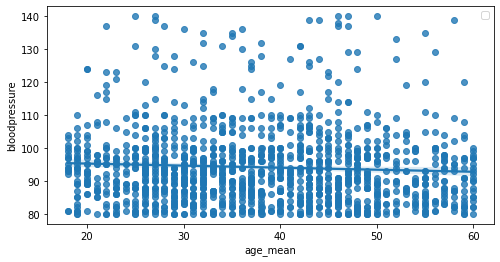

<Figure size 576x288 with 0 Axes>

In [134]:
#Bivariate analysis of continuous variables with age
for variable in ['bmi', 'bloodpressure']:
    sns.regplot(x= 'age_mean', y=variable, data=df)
    plt.legend(loc=(0))
    plt.figure(figsize=(8, 4))

    Average age of diabetic & non-diabetic policyholder is almost same.Distribution of age also looks same
    Average age of smoker & non-smoker policyholder is almost same. Distribution of age also looks same
    Average age of policyholders with different childrens is almost same. Distribution of age also looks same except for policyholders with 4 childrens
    As age increasing, bmi decreasing slighltly(regline). No clear light on bmi wrt age
    As age increasing, bloodpressure decreasing slighltly(regline). No clear light on bloddpressure wrt age

###### smoker

<AxesSubplot:xlabel='children'>

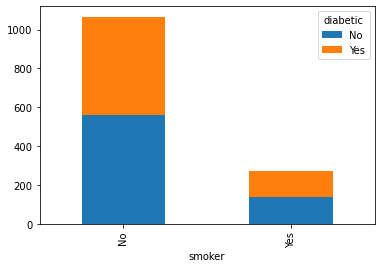

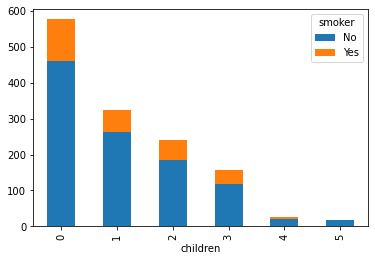

In [136]:
#Bivariate analysis of discrete & categorical variables with smoker
#Visualization
pd.crosstab(df['smoker'], df['diabetic']).plot(kind='bar', stacked=True)
pd.crosstab(df['children'], df['smoker']).plot(kind='bar', stacked=True)

In [135]:
#Descriptive stats

print(pd.crosstab(index=df['smoker'], columns=df['diabetic'],normalize="index"))
print("")
print(pd.crosstab(index=df['children'], columns=df['smoker'],normalize="index"))


diabetic        No       Yes
smoker                      
No        0.525328  0.474672
Yes       0.503650  0.496350

smoker          No       Yes
children                    
0         0.800347  0.199653
1         0.811728  0.188272
2         0.770833  0.229167
3         0.751592  0.248408
4         0.880000  0.120000
5         0.944444  0.055556


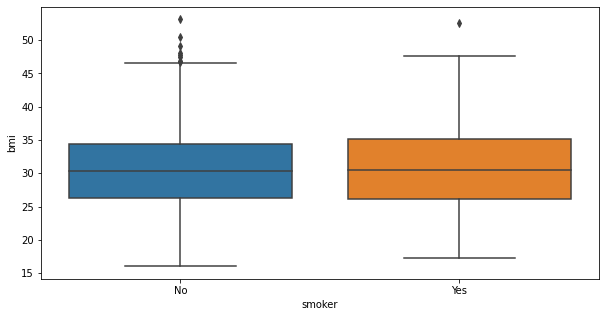

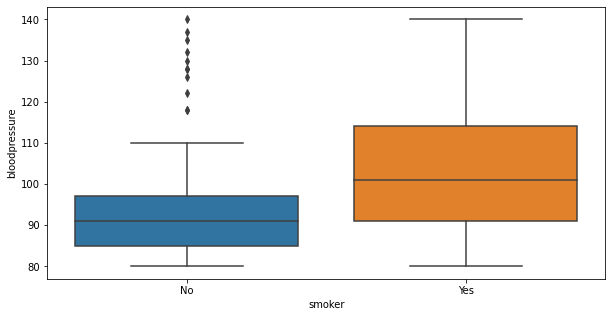

In [138]:
#Bivariate analysis of continuous variables with region
#visualization
for variable in ['bmi', 'bloodpressure']:
    fig_dims = (10, 5)
    fig, axs = plt.subplots(nrows=1, figsize=fig_dims)
    sns.boxplot(data = df, x = 'smoker', y = variable )

In [137]:
#Descriptive stat
for variable in ['bmi', 'bloodpressure']:
    print(variable , df.groupby(["smoker"])[variable].agg(["mean"]))
    print("")

bmi              mean
smoker           
No      30.657598
Yes     30.713139

bloodpressure               mean
smoker            
No       91.733583
Yes     103.587591



    More proportion of smokers in policyholders who are diabetic as compared to policyholders who don't smoke
    As the policyholder's number of children increases smoking proportion also increases
    Distribution of bmi for smoker & non-smoker is almost same but smokers have slightly higher bmi
    Policyholders who smoke have higher bloodpressure

#### Multivariate Analysis

Checking my assumptions:
1. Claim amount will be different for male & female when subgrouped by age 
2. Younger smoker policyholder will have low claim amount as compared to older smoker policyholder
3. Smoking increases bmi
4. whether males have higher bmi as compared to women & ahve higher claim amount?


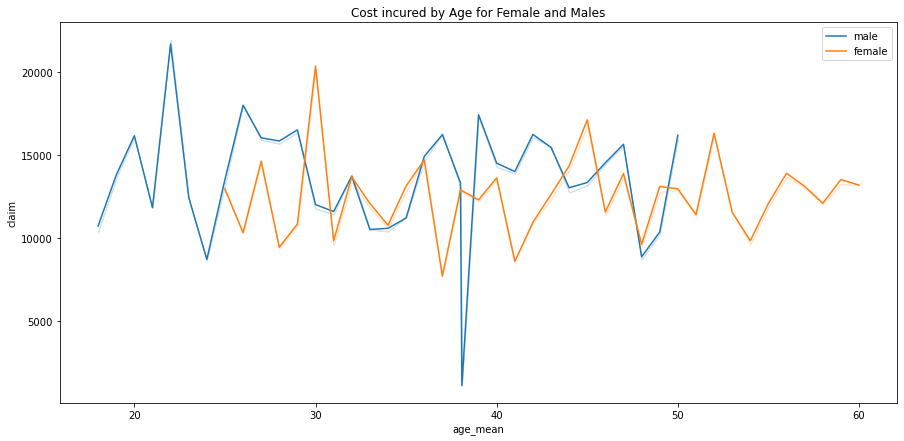

In [139]:
#1.
plt.figure(figsize=(15,7))
sns.lineplot(df["age_mean"],df["claim"],hue=df["gender"],ci=0).set(title= 'Cost incured by Age for Female and Males')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

    Sudden spike in claim for women at the age of around 30
    Sudden spike in claim for men at the age of around 22 and sudden down around 38

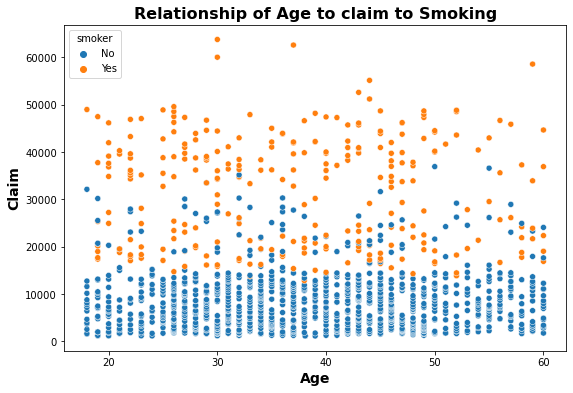

In [140]:
#2
fig1 = plt.figure(figsize=[9,6]);
ax0 = sns.scatterplot(data=df, x = 'age_mean', y = 'claim', hue='smoker');
plt.xlabel('Age', fontsize='14', fontweight='bold');
plt.ylabel('Claim', fontsize='14', fontweight='bold');
plt.title('Relationship of Age to claim to Smoking', fontsize='16', fontweight='bold');

    Can't see any such relation

In [141]:
#creating groups for age
category1=pd.cut(df.age_mean,bins=[18,40,60],labels=['18-40','40-60'])
df.insert(6,'AgeBin',category1)

In [142]:
# smoking policyholder with different age and gender have diffrent claim amount? 
df.groupby(['AgeBin', 'gender' ,'smoker']).mean()['claim'].unstack()

smoker                  No           Yes
AgeBin gender                           
18-40  female  8793.681590  30584.788571
       male    8218.805113  32531.310885
40-60  female  8737.944026  30748.938333
       male    7679.160733  33970.458000

smoking policyholders in the age group of (40-60) have higher claim amount as compared to age group of (18-40). 

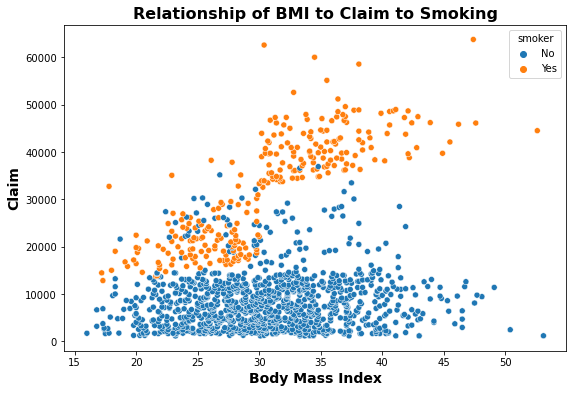

In [143]:
#3
fig1 = plt.figure(figsize=[9,6]);
ax0 = sns.scatterplot(data=df, y = 'claim', x = 'bmi', hue='smoker');
plt.xlabel('Body Mass Index', fontsize='14', fontweight='bold');
plt.ylabel('Claim', fontsize='14', fontweight='bold');
plt.title('Relationship of BMI to Claim to Smoking', fontsize='16', fontweight='bold');

    Smoking and Obesity are directly proportional to the claim amount. All things equal, a smoker with a higher BMI will cost more than a non-smoker with the same BMI.

In [144]:
#making groups for BMI
category=pd.cut(df.bmi,bins=[15,25,35,45,55],labels=['0-18.49','18.5-24.9','25-29.9','30-55'])
df.insert(5,'BMIGroup',category)

In [145]:
df.head()

,gender,bmi,bloodpressure,diabetic,children,BMIGroup,smoker,AgeBin,region,claim,age_mean
0,male,23.2,91,Yes,0,0-18.49,No,18-40,southeast,1121.87,39.000000
1,male,30.1,87,No,0,18.5-24.9,No,18-40,southeast,1131.51,24.000000
2,male,33.3,82,Yes,0,18.5-24.9,No,18-40,southeast,1135.94,38.078652
3,male,33.7,80,No,0,18.5-24.9,No,18-40,northwest,1136.40,38.078652
4,male,34.1,100,No,0,18.5-24.9,No,18-40,northwest,1137.01,38.078652


In [146]:
df.groupby(df.BMIGroup).claim.mean()

BMIGroup
0-18.49      10249.694476
18.5-24.9    12720.254413
25-29.9      16860.603401
30-55        17547.927500
Name: claim, dtype: float64

In [147]:
#4
df.groupby(['gender','BMIGroup']).mean()['claim'].unstack()

BMIGroup,0-18.49,18.5-24.9,25-29.9,30-55
gender,,,,
female,10912.823130,11999.488151,14937.032302,25928.807500
male,9507.217094,13428.116931,18552.858987,11960.674167


Claim amount for female obese policyholder is more than male obese policyholder

#### Conclusions of EDA done so far

Policyholders who smoke have higher a claim amount.

Males who smoke have higher bills.
Female who are nonsmoker also have more claims to nonsmoker males this may be because of child birth , need to explore claims type to understand better.

Beneficiary with 2 or 3 dependent have billed higher compared to policyholders who have 4 or 5.This is unusual and may be because of uneven number of observations in each group. For example, no dependents group has 574 observations whereas five dependents group only has 18.


When did bivariate between gender & smoker, we found out that smokers are more in male. Also bmi & bloodpressure  are higher in male as compared to female. So, may be because of this Claim for male is high

Female Policyholders having bmi greater than 30 have higer claim amount as compared to men with same bmi range